In [ ]:
''# if (!require("devtools")) {
#   install.packages("devtools")
# }
# devtools::install_github("meichendong/SCDC")

In [22]:
BiocManager::install("Biobase")


Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.0 (2019-04-26)

Installing package(s) 'Biobase'

Installation path not writeable, unable to update packages: arm, bdsmatrix,
  bit, blob, boot, broom, callr, caret, checkmate, chron, class, cli, covr,
  crosstalk, DelayedArray, dendextend, devtools, digest, dplyr, DRR, DT, edgeR,
  ellipsis, farver, float, foreach, fpc, fs, GenomeInfoDb, ggplot2, ggrepel,
  ggridges, gh, git2r, gtools, hexbin, Hmisc, igraph, intervals, IRanges,
  jsonlite, KernSmooth, knitr, lattice, lava, lifecycle, limma, lme4, locfit,
  lpSolve, lubridate, MASS, matrixStats, maxLik, mclust, mime, mnormt,
  ModelMetrics, modeltools, mvtnorm, nlme, nloptr, NMF, nnet, optparse, pillar,
  pkgbuild, PKI, plm, plotly, plyr, prettyunits, pROC, processx, ps, purrr,
  R.methodsS3, Rcpp, RcppCCTZ, RcppProgress, RCurl, recipes, remotes, reshape2,
  rex, RgoogleMaps, RJSONIO, rlang, rmarkdown, rngtools, robustbase, roxygen2,
  rstudioapi, rsvd, rversions, S4Vectors, scales,

In [ ]:
#devtools::install_github("renozao/xbioc")
#BiocManager::install("Biobase")

In [1]:
library(SCDC)
library(dplyr)
library(Biobase)
library(xbioc)
library(MuSiC)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
 

In [2]:
getwd()

[1] "/labshare/anni/deconvolution"

### formatting nabec single nuclei data to Expression set

In [4]:
snnabec <- read.csv('./nabec/scnabec_scanpy_raw_unassigned_ExSet.txt',sep='\t', header=1, row.names = 1)
snnabec_mtx <- as.matrix(snnabec)
colnames(snnabec_mtx) <- gsub(x = colnames(snnabec_mtx), pattern = "\\.", replacement = "-")
#head(snnabec_mtx)

##subset expression matrix
#snnabec_mtx_subset <- snnabec_mtx[,1:3000]
head(snnabec_mtx_subset)

,AAACCCAAGACAACAT-1,AAACCCAAGATGAATC-1,AAACCCAAGCTGGCCT-1,AAACCCAAGGTCCCGT-1,AAACCCAAGGTTGAGC-1,AAACCCACAAATACGA-1,AAACCCACACCGGAAA-1,AAACCCACATTGACCA-1,AAACCCAGTATCGCAT-1,AAACCCAGTCCAAAGG-1,⋯,ATCAGGTCACCTGCTT-1,ATCAGGTCAGACCAAG-1,ATCAGGTCATGGCCAC-1,ATCAGGTGTAAGTTAG-1,ATCAGGTGTCCCAAAT-1,ATCAGGTGTCCTCCTA-1,ATCAGGTGTCTGCCTT-1,ATCAGGTGTTCGGCGT-1,ATCAGGTGTTGAATCC-1,ATCAGGTGTTTAGAGA-1
AL627309.1,0,0,0.0000000,0,0,0,0.0000000,0.0000000,0,0,⋯,0.00000,0,0,0.000000,0,0,0.0000000,0.000000,0,0
AL627309.2,0,0,0.0000000,0,0,0,0.0000000,0.0000000,0,0,⋯,0.00000,0,0,0.000000,0,0,0.0000000,0.000000,0,0
AC114498.1,0,0,0.0000000,0,0,0,0.0000000,0.0000000,0,0,⋯,0.00000,0,0,0.000000,0,0,0.0000000,0.000000,0,0
AL669831.5,0,0,0.4268234,0,0,0,0.9543982,0.6393086,0,0,⋯,1.21652,0,0,1.051011,0,0,0.5398452,0.371514,0,0
FAM87B,0,0,0.0000000,0,0,0,0.0000000,0.0000000,0,0,⋯,0.00000,0,0,0.000000,0,0,0.0000000,0.000000,0,0
LINC00115,0,0,0.0000000,0,0,0,0.0000000,0.0000000,0,0,⋯,0.00000,0,0,0.000000,0,0,0.0000000,0.000000,0,0


In [22]:
dim(snnabec_mtx_subset)

[1] 27009  3000

In [5]:
snnabec_pheno_file <- read.csv('./nabec/scnabec_scanpy_raw_unassigned_NOOAM_labels_ExSet.txt',sep='\t', header=1, row.names = 1)
snnabec_pheno <- as.data.frame(snnabec_pheno_file)
snnabec_pheno$cluster = snnabec_pheno$Celltype
snnabec_pheno$sample = 'SCAF705_190320_A72'
#head(snnabec_pheno)

##subset nabec single cell samples
#snnabec_pheno_subset <- head(snnabec_pheno,3000)
#head(snnabec_pheno_subset)
head(snnabec_pheno)

,Celltype,cluster,sample
,<fct>,<fct>,<chr>
AAACCCAAGACAACAT-1,Neuron,Neuron,SCAF705_190320_A72
AAACCCAAGATGAATC-1,Neuron,Neuron,SCAF705_190320_A72
AAACCCAAGCTGGCCT-1,Neuron,Neuron,SCAF705_190320_A72
AAACCCAAGGTCCCGT-1,Oligodendrocyte,Oligodendrocyte,SCAF705_190320_A72
AAACCCAAGGTTGAGC-1,Oligodendrocyte,Oligodendrocyte,SCAF705_190320_A72
AAACCCACAAATACGA-1,Oligodendrocyte,Oligodendrocyte,SCAF705_190320_A72


In [5]:
dim(snnabec_pheno_subset)

[1] 3000    3

In [23]:
dim(snnabec_mtx_subset)

[1] 27009  3000

In [15]:
phenoData <- new("AnnotatedDataFrame", data=snnabec_pheno)
phenoData

An object of class 'AnnotatedDataFrame'
  rowNames: AAACCCAAGACAACAT-1 AAACCCAAGATGAATC-1 ...
    TTTGTTGTCTTCCACG-1 (15774 total)
  varLabels: Celltype cluster sample
  varMetadata: labelDescription

In [17]:
nabecSet <- ExpressionSet(assayData=snnabec_mtx,phenoData=phenoData)

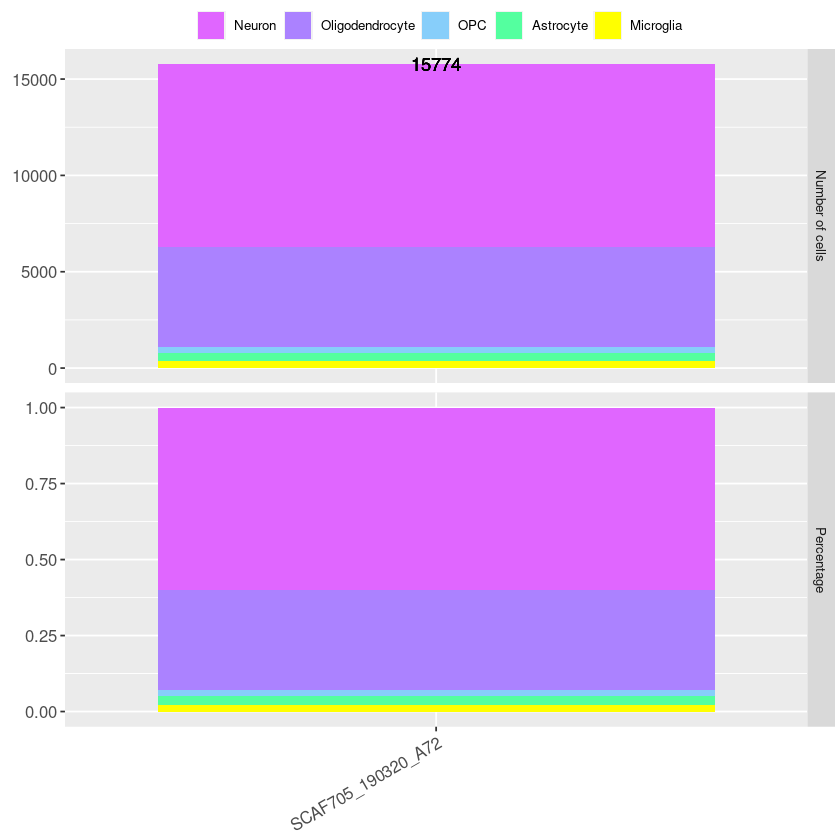

In [18]:
ct1 <- c("mediumorchid1","mediumpurple1","lightskyblue","seagreen1","yellow")
#seger <- readRDS("segerstolpe.rds")
#png(file="./SCDC_snnabec_plot.png",width=600, height=350)
DemoPlot(nabecSet, cluster = "cluster", sample = "sample", select.ct = c("Neuron","Oligodendrocyte","OPC","Astrocyte","Microglia"), Palette = ct1)



In [ ]:
# ct1 <- c("mediumorchid1","mediumpurple1","lightskyblue","seagreen1","yellow","tan1","azure3")
# seger <- readRDS("segerstolpe.rds")
# DemoPlot(seger, cluster = "cluster", sample = "sample", select.ct = c("alpha","beta","delta","gamma","ductal","acinar"), Palette = ct1)


### formatting rosmap single nuclei data to Expression set

In [10]:
snrosmap <- read.csv('./rosmap/scrosmap_scanpy_raw_unassigned_ExSet.txt',sep='\t', header=1, row.names = 1)
snrosmap_mtx <- as.matrix(snrosmap)
colnames(snrosmap_mtx) <- gsub(x = colnames(snrosmap_mtx), pattern = "\\.", replacement = "-")
#head(snrosmap_mtx)

In [11]:
snrosmap_pheno <- read.csv('./rosmap/scrosmap_scanpy_raw_unassigned_NOOAM_labels_ExSet.txt',sep='\t', header=1, row.names = 1)
#snrosmap_pheno <- as.data.frame(snrosmap_pheno_file)
snrosmap_pheno$cluster = snrosmap_pheno$Celltype
snrosmap_pheno$sample = 'MFC-B1-S1-Cdx1-pAD0'
#head(snrosmap_pheno)

In [12]:
phenoData_rosmap <- new("AnnotatedDataFrame", data=snrosmap_pheno)
phenoData_rosmap

An object of class 'AnnotatedDataFrame'
  rowNames: AAACCTGAGACCTAGG-1 AAACCTGCACGACTCG-1 ...
    TTTGTCATCTCGGACG-1 (5013 total)
  varLabels: Celltype cluster sample
  varMetadata: labelDescription

In [13]:
rosmapSet <- ExpressionSet(assayData=snrosmap_mtx,phenoData=phenoData_rosmap)

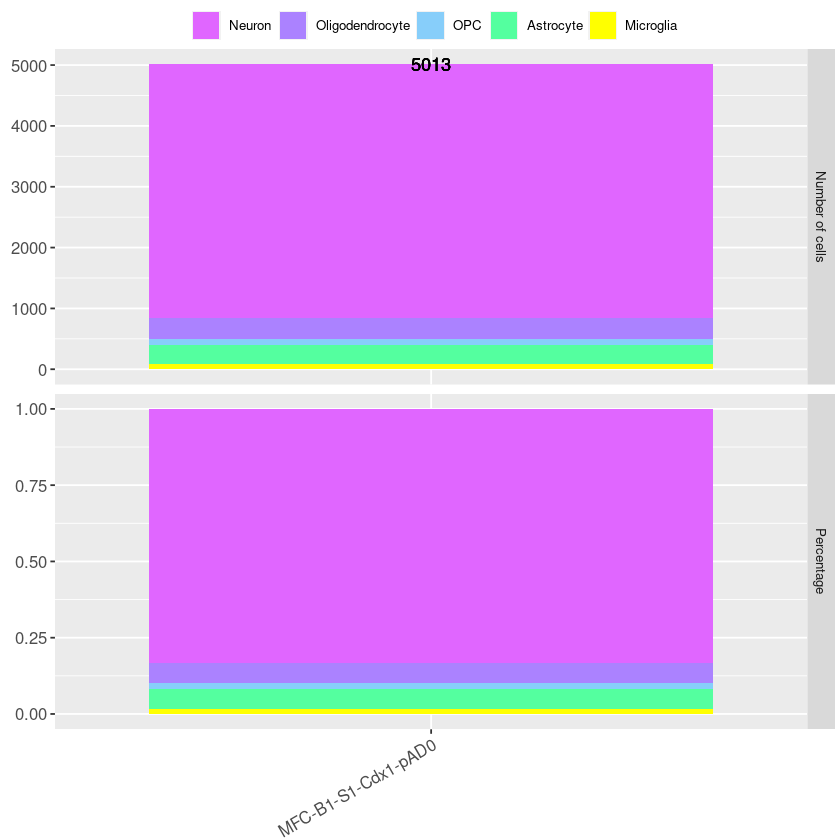

In [14]:
ct1 <- c("mediumorchid1","mediumpurple1","lightskyblue","seagreen1","yellow")
#pdf(file="./SCDC_snrosmap_plot.pdf",width=600, height=350)
DemoPlot(rosmapSet, cluster = "cluster", sample = "sample", select.ct = c("Neuron","Oligodendrocyte","OPC","Astrocyte","Microglia"), Palette = ct1)

## loading in bulk data

In [11]:
brain_bulk_file = read.csv('./bulk_nabec_rosmap_gene_numreads_genenames_nodups.txt',sep='\t', row.names = 1)
brain_bulk_mtx <- as.matrix(brain_bulk_file)
#head(brain_bulk_mtx)

,SM.CTDSC,SM.CJGMZ,SM.CJIXK,SM.CJIZR,SM.CTEET,SM.CJJ1M,SM.CJIYJ,SM.CJIYA,SM.CTEER,SM.CJK3I,⋯,UMARY.72,UMARY.794,UMARY.813,UMARY.814,UMARY.818,UMARY.819,UMARY.871,UMARY.879,UMARY.914,UMARY.933
MIR517A,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,⋯,0,0,0,0,0,0,0,0,0,0
AC007952.5,4,13.219,3,15.429,2,13.038,11,2.359,8,11.238,⋯,6,5,1,2,1,0,1,1,11,2
MIR518C,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,⋯,0,0,0,0,0,0,0,0,0,0
MIR520C,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,⋯,0,0,0,0,0,0,0,0,0,0
MIR526A1,0,0.000,0,0.000,0,0.000,0,0.000,0,0.000,⋯,0,0,0,0,0,0,0,0,0,0
AC099542.2,0,0.000,0,0.000,0,0.000,0,1.000,0,0.000,⋯,0,0,0,0,0,0,0,0,0,0


In [7]:
brain_bulk_file = read.csv('./nabec/nabec_gene_numreads_genenames_nodups.txt',sep='\t', row.names = 1)
brain_bulk_mtx <- as.matrix(brain_bulk_file)
#head(brain_bulk_mtx)

In [17]:
#input the list of single cell ExpressionSet objects
# brain.sc <- list(baron = qc.baron$sc.eset.qc,
#                     seger = qc.seger$sc.eset.qc,
#                     xin = qc.xin$sc.eset.qc)

# brain.sc <- list(nabec = nabecSet,
#                     rosmap = rosmapSet)

In [8]:
# This might take several minutes, depending on the search.length set by user.
# PS_ensemble <- SCDC_ENSEMBLE(bulk.eset = brain_bulk_mtx, 
#                              sc.eset.list = brain.sc,
#                              sample = "sample", 
#                              ct.varname = "cluster",
#                              ct.sub =  c("Neuron","Oligodendrocyte","Astrocyte","Microglia","OPC"), 
#                              search.length = 0.01)

# PS_ensemble <- SCDC_ENSEMBLE(bulk.eset = brain_bulk_mtx, sc.eset.list = list(nabec = nabecSet, rosmap = rosmapSet), 
#                              ct.varname = "cluster", sample = "sample", 
#                              truep = NULL, ct.sub =  c("Neuron","Oligodendrocyte","Astrocyte","Microglia","OPC"), 
#                              search.length = 0.01, grid.search = T)  

PS_ensemble <- SCDC_ENSEMBLE(bulk.eset = brain_bulk_mtx, sc.eset.list = list(nabec = nabecSet), 
                             ct.varname = "cluster", sample = "sample", 
                             truep = NULL, ct.sub =  c("Neuron","Oligodendrocyte","Astrocyte","Microglia","OPC"), 
                             search.length = 0.01, grid.search = T)  
#> fadista.healthy.ens$w_table

Creating Basis Matrix adjusted for maximal variance weight

Used 25862 common genes...

Used 5 cell types in deconvolution...

SH.00.34 has common genes 21517 ...

WNNLS Converged at iteration 144

SH.00.38 has common genes 21535 ...

WNNLS Converged at iteration 152

SH.00.49 has common genes 20709 ...

WNNLS Converged at iteration 74

SH.01.31 has common genes 20976 ...

WNNLS Converged at iteration 266

SH.01.37 has common genes 20902 ...



In [2]:
##loading in SCDC results
SCDC_result <- readRDS(file = "SCDC_nabec_rosmap.rds")

In [3]:
nabec_prop <- SCDC_result$prop.only
nabec_prop
#write.csv(nabec_prop,"./SCDC_nabec_prop.csv", row.names = TRUE)

,Neuron,Oligodendrocyte,Astrocyte,Microglia,OPC
SM.CTDSC,4.252645e-02,0,0.9566864,0.0007871768,0
SM.CJGMZ,0.000000e+00,0,0.9660593,0.0339407197,0
SM.CJIXK,3.356403e-04,0,0.9996644,0.0000000000,0
SM.CJIZR,1.590840e-02,0,0.9484700,0.0356216217,0
SM.CTEET,0.000000e+00,0,0.9723321,0.0276678703,0
SM.CJJ1M,5.441777e-02,0,0.9252040,0.0203782777,0
SM.CJIYJ,1.881406e-02,0,0.9426475,0.0385384455,0
SM.CJIYA,8.511112e-02,0,0.9148889,0.0000000000,0
SM.CTEER,0.000000e+00,0,0.9992142,0.0007857933,0
SM.CJK3I,4.028478e-02,0,0.9597152,0.0000000000,0


In [24]:
rosmap_prop <- SCDC_result$prop.only$rosmap
rosmap_prop
write.csv(rosmap_prop,"./SCDC_rosmap_prop.csv", row.names = TRUE)

,Neuron,Oligodendrocyte,Astrocyte,Microglia,OPC
SM.CTDSC,1.0000000,0.00000000,0.00000000,0.00000000,0
SM.CJGMZ,0.6722034,0.21655753,0.00000000,0.11123909,0
SM.CJIXK,0.5137992,0.37539171,0.00000000,0.11080910,0
SM.CJIZR,0.7153026,0.23226585,0.00000000,0.05243159,0
SM.CTEET,0.5836478,0.30270687,0.00000000,0.11364536,0
SM.CJJ1M,1.0000000,0.00000000,0.00000000,0.00000000,0
SM.CJIYJ,0.7073461,0.25328758,0.00000000,0.03936630,0
SM.CJIYA,0.7757748,0.13733073,0.00000000,0.08689446,0
SM.CTEER,0.6108765,0.27088940,0.00000000,0.11823407,0
SM.CJK3I,1.0000000,0.00000000,0.00000000,0.00000000,0


In [13]:
SCDC_result$Est.prop.allgene

NULL

### testing MuSiC

In [6]:
#loading bulk nabec
nabec_bulk_file = read.csv('./nabec/nabec_gene_numreads_genenames_nodups.txt',sep='\t', row.names = 1)
nabec_bulk_mtx <- as.matrix(nabec_bulk_file)
colnames(nabec_bulk_mtx) <- gsub(x = colnames(nabec_bulk_mtx), pattern = "\\.", replacement = "-")
head(nabec_bulk_mtx)

In [11]:
nabec_bulk_pheno <- read.csv('./nabec/nabec_gene_numreads_genenames_nodups_phenoData.txt',sep='\t', header=1, row.names = 1)
nabec_bulk_pheno <- as.data.frame(nabec_bulk_pheno)
colnames(nabec_bulk_pheno) <- c("sample", "tissue")
head(nabec_bulk_pheno)

,sample,tissue
,<fct>,<fct>
SH-00-34,SH-00-34,cortex
SH-00-38,SH-00-38,cortex
SH-00-49,SH-00-49,cortex
SH-01-31,SH-01-31,cortex
SH-01-37,SH-01-37,cortex
SH-02-08,SH-02-08,cortex


In [12]:
# phenoData_bulk <- new("AnnotatedDataFrame", data=nabec_bulk_pheno)
# phenoData_bulk

An object of class 'AnnotatedDataFrame'
  rowNames: SH-00-34 SH-00-38 ... UMARY-933 (311 total)
  varLabels: sample tissue
  varMetadata: labelDescription

In [22]:
dim(nabec_bulk_mtx)

[1] 59032   311

In [23]:
nabecBulk <- ExpressionSet(assayData=nabec_bulk_mtx)
#nabecBulk <- ExpressionSet(assayData=nabec_bulk_mtx, phenoData=phenoData_bulk)

In [24]:
nabecBulk

ExpressionSet (storageMode: lockedEnvironment)
assayData: 59032 features, 311 samples 
  element names: exprs 
protocolData: none
phenoData: none
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

In [21]:
nabecSet

ExpressionSet (storageMode: lockedEnvironment)
assayData: 27009 features, 3000 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: AAACCCAAGACAACAT-1 AAACCCAAGATGAATC-1 ...
    ATCAGGTGTTTAGAGA-1 (3000 total)
  varLabels: Celltype cluster sample
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
Annotation:  

In [26]:
# Estimate cell type proportions

Est.prop.nabec = music_prop(bulk.eset = nabecBulk, sc.eset = nabecSet, clusters = 'Celltype',
                               samples = 'sample', select.ct = c('Neuron', 'Oligodendrocyte', 'OPC', 
                                                                 'Astrocyte','Microglia'), verbose = F)
#names(Est.prop.nabec)
#[1] "Est.prop.weighted" "Est.prop.allgene"  "Weight.gene"       "r.squared.full"    "Var.prop"  

ERROR: Error in colMeans(S, na.rm = TRUE): 'x' must be an array of at least two dimensions


In [ ]:
saveRDS(Est.prop.nabec, file = "MuSiC_nabec_result.rds")

In [17]:
memory.limit(size = 56000)

Warning message:
“'memory.limit()' is Windows-specific”


[1] Inf